In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files und

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Setup an Load the Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/kaggle/input/kidney-disease-risk-dataset/kidney_disease_dataset.csv")

**Exploratory Data Analysis(EDA)**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [3]:
df.describe()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,54.159288,1.305638,18.813672,0.406684,0.498264,68.953863,1309.189670,0.508681,0.013455
std,20.513729,0.789594,10.508358,0.491322,0.500106,24.660191,491.951914,0.500033,0.115237
min,20.000000,0.300000,5.000000,0.000000,0.000000,5.000000,100.000000,0.000000,0.000000
25%,36.000000,0.620000,9.975000,0.000000,0.000000,51.300000,967.750000,0.000000,0.000000
50%,54.000000,1.240000,18.200000,0.000000,0.000000,69.150000,1295.500000,1.000000,0.000000
75%,72.000000,1.842500,26.000000,1.000000,1.000000,86.300000,1633.500000,1.000000,0.000000
max,90.000000,4.130000,61.900000,1.000000,1.000000,120.000000,2899.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

Age                 0
Creatinine_Level    0
BUN                 0
Diabetes            0
Hypertension        0
GFR                 0
Urine_Output        0
CKD_Status          0
Dialysis_Needed     0
dtype: int64

In [5]:
df.head(10)

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0
5,22,0.58,15.9,0,1,89.2,1795.0,0,0
6,41,0.93,10.3,1,1,93.8,1641.0,0,0
7,72,0.47,61.9,1,1,67.9,229.0,1,0
8,21,0.30,22.3,1,1,80.2,2251.0,0,0
9,49,1.17,31.0,0,1,64.4,1156.0,1,0


In [6]:
df.tail(5)

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
2299,89,1.11,5.0,1,0,55.1,1344.0,1,0
2300,89,0.30,5.0,0,0,47.5,2156.0,1,0
2301,84,0.30,7.3,1,0,120.0,1353.0,0,0
2302,24,1.58,26.4,1,0,75.6,1067.0,0,0
2303,21,0.63,27.1,1,0,50.7,393.0,1,0


<Axes: xlabel='Hypertension', ylabel='count'>

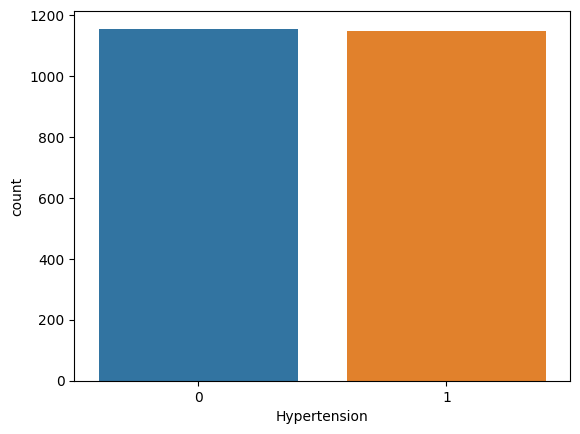

In [7]:
sns.countplot(x="Hypertension" , data=df)

<Axes: xlabel='Hypertension', ylabel='Age'>

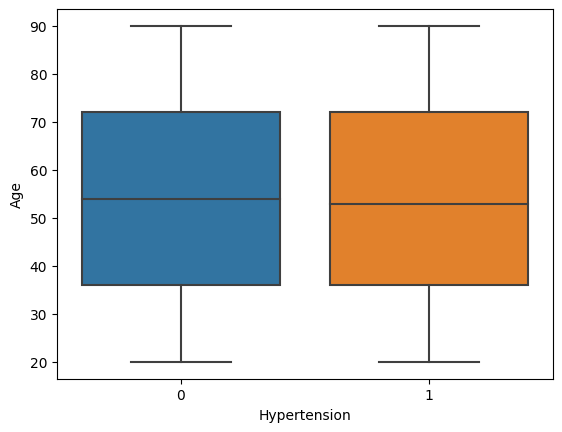

In [8]:
sns.boxplot(x="Hypertension", y="Age",data=df)

<Axes: >

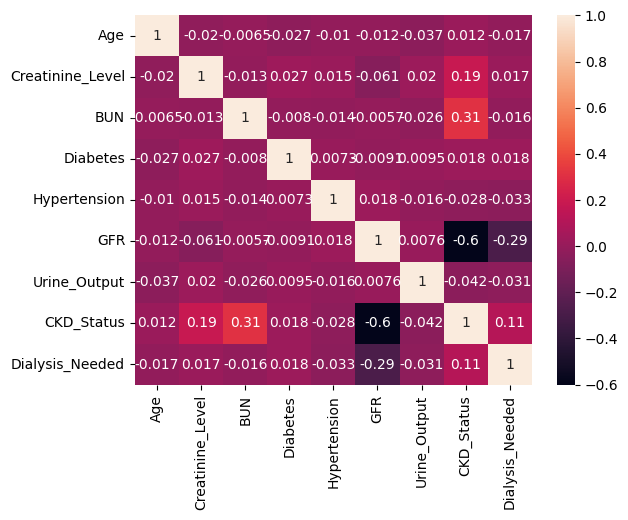

In [9]:
sns.heatmap(df.corr(), annot=True)

**Preprocessing**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and Target
X = df.drop(['Hypertension'], axis=1)
y = df['Hypertension']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Machine Learning Model**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5010845986984815
[[129  89]
 [141 102]]


## PROJECT :  Kidney Disease Risk Prediction

## OBJECTIVE: This synthetic but medically realistic dataset is designed to help researchers, data scientists, and healthcare professionals explore Chronic Kidney Disease (CKD) risk and predict the need for dialysis using machine learning models.

### DATASET: [Kidney Disease Risk Dataset on kaggle](https://www.kaggle.com/datasets/miadul/kidney-disease-risk-dataset/data)

## KEY FEATURES: Age , BUN(Blood Urea Nitrogen), Diabetes, Hypertension, Urine_Output , GFR.

## MODEL USED: Random Forest Classifier 

## RESULTS: Accuracy: ~95%
      -Most important features: albumin, blood pressure , hemoglobin , sugar